In [41]:
import os

def count_files_in_subdirectories(parent_directory):
    res = {}
    # 遍历指定目录下的所有子文件夹
    for folder_name in os.listdir(parent_directory):
        folder_path = os.path.join(parent_directory, folder_name)
        # 确保这是一个文件夹而不是文件
        if os.path.isdir(folder_path):
            file_count = sum(1 for _ in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, _)))
#             print(f"The folder '{folder_name}' contains {file_count} files.")
            res[folder_name] = file_count
    return res

# 指定要检查的目录路径
parent_directory = './photos_20240422'
photo_dict = count_files_in_subdirectories(parent_directory)
sum(photo_dict.values())

12295

In [35]:
import random

def random_subset(input_dict, p=0.5, seed=None, max_count=None, min_count=None):
    # 如果提供了种子，则设置随机种子以确保结果的可重复性
    if seed is not None:
        random.seed(seed)
    
    # 获取所有键的列表
    keys = list(input_dict.keys())
    # 随机打乱键的顺序
    random.shuffle(keys)
    
    # 计算要抽取的键的数量
    num_keys = len(keys)
    num_to_select = int(num_keys * p)
    
    # 选择指定数量的键
    selected_keys = keys[:num_to_select]
    
    # 使用选择的键来创建一个新的子集字典
    subset_dict = {key: input_dict[key] for key in selected_keys}
    
    # 过滤太大或太小的文件夹
    if max_count:
        subset_dict = {k: v for k, v in subset_dict.items() if v <= max_count}
    if min_count:
        subset_dict = {k: v for k, v in subset_dict.items() if v >= min_count}
    
    return subset_dict

# 调用函数并打印结果，抽取50%的键
subset = random_subset(photo_dict, p=0.5, seed=22, max_count=200, min_count=15)
print(len(subset), sum(subset.values()))

200 12982


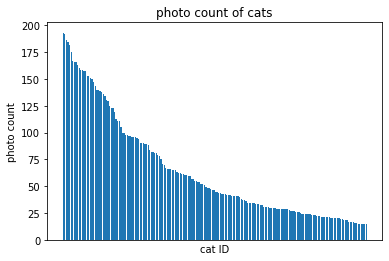

190 12295


In [44]:
import matplotlib.pyplot as plt

def plot_sorted_bar_chart(data):
    # 根据字典的值进行降序排序，并获取排序后的键和值
    sorted_data = sorted(data.items(), key=lambda item: item[1], reverse=True)
    keys = [item[0] for item in sorted_data]
    values = [item[1] for item in sorted_data]
    
    # 创建柱状图
    plt.bar(keys, values)
    
    # 隐藏x轴的刻度标签
    plt.xticks([])
    
    # 显示y轴的刻度标签
    plt.yticks()
    
    # 添加标题和轴标签
    plt.title('photo count of cats')
    plt.xlabel('cat ID')
    plt.ylabel('photo count')
    
    # 显示图表
    plt.show()
    
    print(len(data), sum(data.values()))
    return

plot_sorted_bar_chart(photo_dict)

In [36]:
# 复制文件

In [37]:
import shutil
import os

def copy_specific_subfolders(src_folder, dst_folder, subfolders):
    # 检查目标文件夹是否存在，如果不存在则创建
    if not os.path.exists(dst_folder):
        os.makedirs(dst_folder)
    
    # 遍历需要复制的子文件夹列表
    for subfolder in subfolders:
        # 构造完整的源子文件夹路径
        src_subfolder = os.path.join(src_folder, subfolder)
        # 构造完整的目标子文件夹路径
        dst_subfolder = os.path.join(dst_folder, subfolder)
        # 检查子文件夹是否存在于源文件夹
        if os.path.exists(src_subfolder):
            # 复制整个子文件夹到目标文件夹
            shutil.copytree(src_subfolder, dst_subfolder)
        else:
            print(f"The subfolder {subfolder} does not exist in the source folder.")

# 指定源文件夹路径
source_folder = './photos'
# 指定目标文件夹路径
destination_folder = './photos_20240422'
# 指定要复制的子文件夹名称列表
subfolders_to_copy = subset.keys()

# 调用函数复制子文件夹
copy_specific_subfolders(source_folder, destination_folder, subfolders_to_copy)